In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_matches = pd.read_csv('/content/WorldCupMatches.csv')
df_players = pd.read_csv('/content/WorldCupPlayers.csv')
df_wc_teams = pd.read_csv('/content/WorldCups.csv')



In [7]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


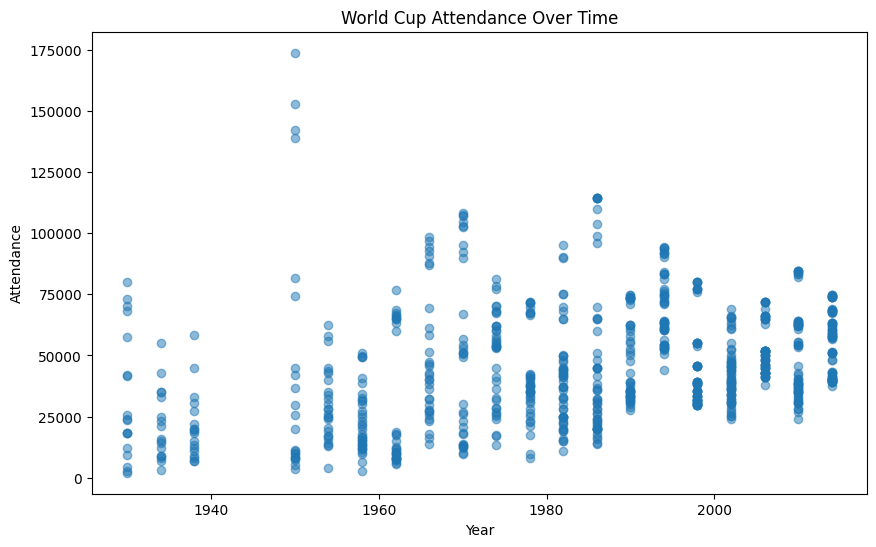

In [21]:
# @title World Cup Attendance Over Time

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_matches['Year'], df_matches['Attendance'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Attendance')
_ = plt.title('World Cup Attendance Over Time')

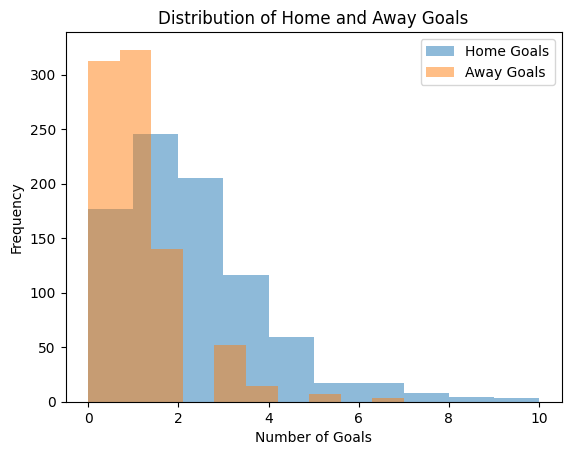

In [18]:
# @title Distribution of Home and Away Goals

import matplotlib.pyplot as plt

# Create the histograms
plt.hist(df_matches['Home Team Goals'], alpha=0.5, label='Home Goals')
plt.hist(df_matches['Away Team Goals'], alpha=0.5, label='Away Goals')

plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Home and Away Goals')
_ = plt.legend()

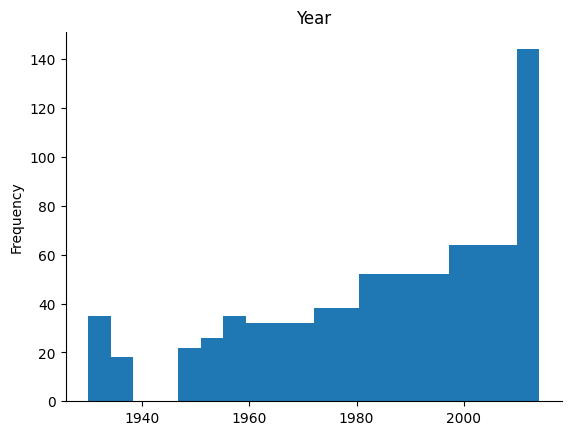

In [17]:
# @title Year

from matplotlib import pyplot as plt
df_matches['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


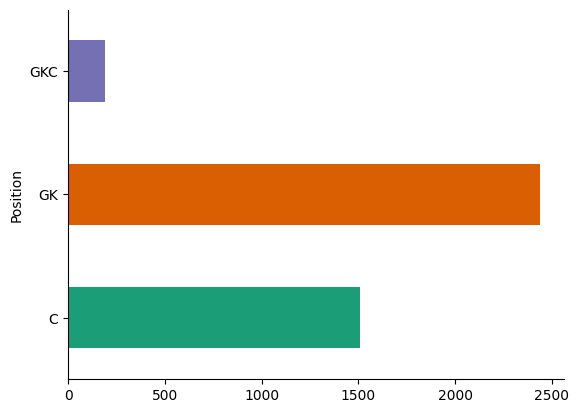

In [25]:
# @title Position

from matplotlib import pyplot as plt
import seaborn as sns
df_players.groupby('Position').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
df_wc_teams.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


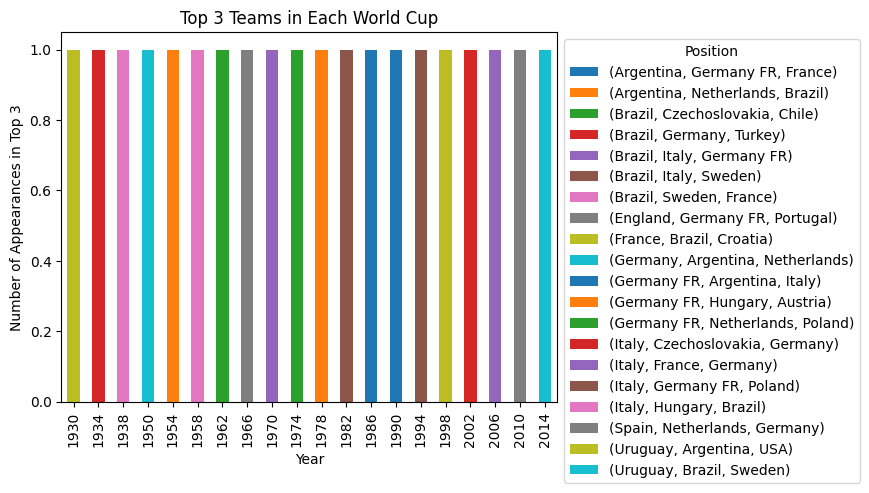

In [24]:
# @title Top 3 Teams in Each World Cup

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df_wc_teams'
# Create a pivot table to count the number of times each team appears in top 3
top3_counts = df_wc_teams.pivot_table(index='Year', columns=['Winner', 'Runners-Up', 'Third'], aggfunc='size', fill_value=0)

# Plot the stacked bar chart
top3_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Appearances in Top 3')
plt.title('Top 3 Teams in Each World Cup')
_ = plt.legend(title='Position', loc='upper left', bbox_to_anchor=(1.0, 1.0))

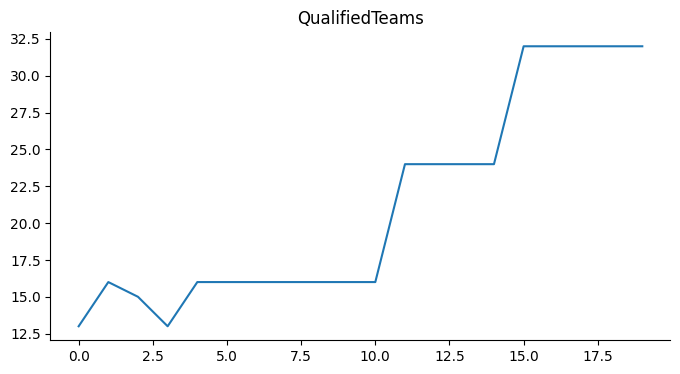

In [20]:
# @title QualifiedTeams

from matplotlib import pyplot as plt
df_wc_teams['QualifiedTeams'].plot(kind='line', figsize=(8, 4), title='QualifiedTeams')
plt.gca().spines[['top', 'right']].set_visible(False)

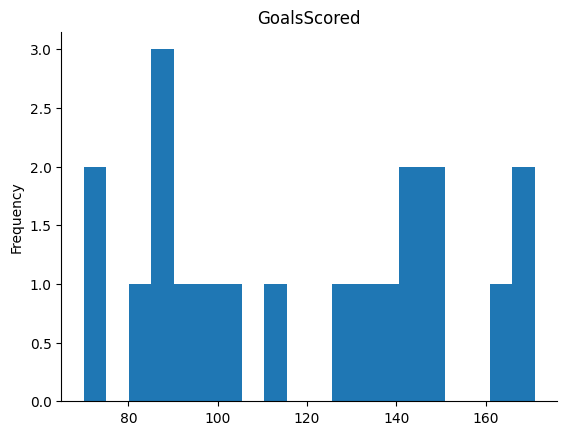

In [19]:
# @title GoalsScored

from matplotlib import pyplot as plt
df_wc_teams['GoalsScored'].plot(kind='hist', bins=20, title='GoalsScored')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# Find key metrics and factors that influence the World Cup win

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [12]:
# Assuming 'Winner', 'Runners-Up', and 'Third' are categorical
df_wc_teams['Country_Encoded'] = le.fit_transform(df_wc_teams['Country'])
df_wc_teams['Winner_Encoded'] = le.fit_transform(df_wc_teams['Winner'])
df_wc_teams['Runners-Up_Encoded'] = le.fit_transform(df_wc_teams['Runners-Up'])
df_wc_teams['Third_Encoded'] = le.fit_transform(df_wc_teams['Third'])

In [13]:
df_wc_teams

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Country_Encoded,Winner_Encoded,Runners-Up_Encoded,Third_Encoded
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,14,8,0,13
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,6,6,2,5
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,4,6,6,1
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,1,8,1,11
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,12,5,6,0
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810,11,1,9,4
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172,2,1,2,2
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135,3,2,5,10
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975,8,1,7,6
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753,5,5,8,9


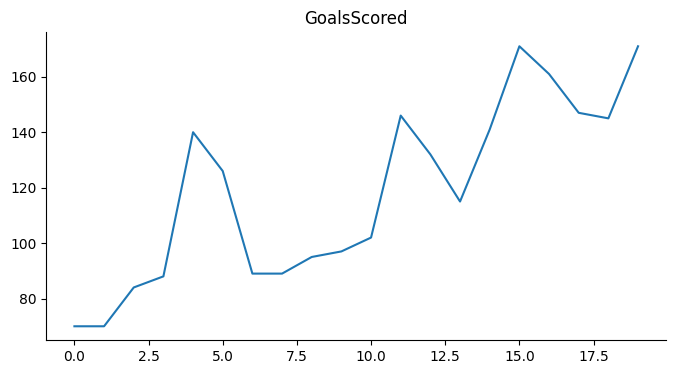

In [23]:
# @title GoalsScored

from matplotlib import pyplot as plt
df_wc_teams['GoalsScored'].plot(kind='line', figsize=(8, 4), title='GoalsScored')
plt.gca().spines[['top', 'right']].set_visible(False)

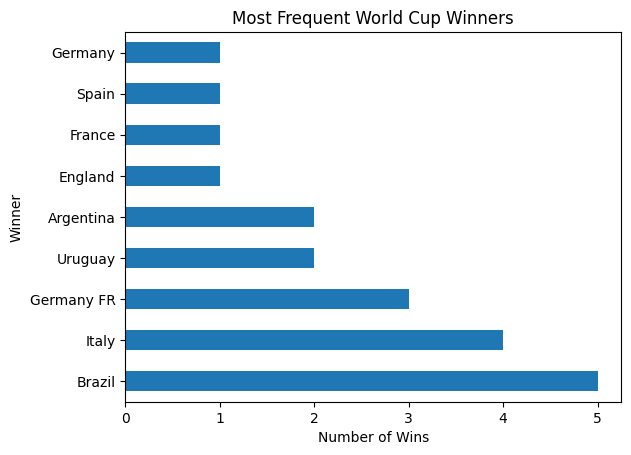

In [22]:
# @title Most Frequent World Cup Winners

import matplotlib.pyplot as plt
df_wc_teams['Winner'].value_counts().plot(kind='barh')
plt.xlabel('Number of Wins')
plt.ylabel('Winner')
_ = plt.title('Most Frequent World Cup Winners')

In [14]:
correlation = df_wc_teams['Winner_Encoded'].corr(df_wc_teams['Country_Encoded'])

In [15]:
print(correlation)

0.09710413321669611


In [16]:
common_values = set(df_wc_teams['Country']).intersection(set(df_wc_teams['Country']))
# set(df['column1']).intersection(set(df['column2']))
# Count the number of common values
num_common_values = len(common_values)

print(num_common_values)

common_df = df_wc_teams[df_wc_teams['Winner'].isin(common_values) & df_wc_teams['Country'].isin(common_values)]
common_df

15


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Country_Encoded,Winner_Encoded,Runners-Up_Encoded,Third_Encoded
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,14,8,0,13
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,6,6,2,5
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,4,6,6,1
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,1,8,1,11
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810,11,1,9,4
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172,2,1,2,2
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135,3,2,5,10
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975,8,1,7,6
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791,0,0,8,1
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723,10,6,5,9
